# Image Feature Extraction and Analysis for Fake News Detection

This notebook implements image analysis techniques to extract features from news article images and build a classification model to detect fake news. Key steps include ELA (Error Level Analysis), feature extraction, and model training.

## Data Loading
Load the training dataset containing image metadata and labels.

In [1]:
import pandas as pd

file_path = 'final_multimodal_train.tsv'

# Load the data
data = pd.read_csv(file_path, sep='\t')

## Error Level Analysis (ELA) Implementation
ELA helps detect image manipulation by analyzing JPEG compression artifacts. The function:
1. Saves image at known quality level
2. Calculates difference between original and recompressed image
3. Amplifies the differences for visualization

In [2]:
from PIL import Image, ImageChops, ImageEnhance
import os
from tqdm import tqdm

def ela_image(image_path, output_path, quality=75):
    try:
        # Open the original image
        original = Image.open(image_path)
        
        # Convert image to RGB mode if needed
        if original.mode != 'RGB':
            original = original.convert('RGB')
        
        # Save temporary compressed image
        temp_path = 'temp.jpg'
        original.save(temp_path, 'JPEG', quality=quality)
        
        # Open compressed image
        recompressed = Image.open(temp_path)
        
        # Calculate difference
        diff = ImageChops.difference(original, recompressed)
        
        # Scale the difference
        extrema = diff.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        
        if max_diff == 0:
            # Create black image if no difference
            scaled = Image.new('RGB', diff.size, 0)
        else:
            # Scale the difference for visibility
            scale = 255.0 / max_diff
            scaled = ImageEnhance.Brightness(diff).enhance(scale)
        
        # Save ELA result
        scaled.save(output_path, 'JPEG')
        
        # Cleanup
        os.remove(temp_path)
        return True
        
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return False

# Create output directory
output_dir = 'ela_images'
os.makedirs(output_dir, exist_ok=True)

## Batch Processing Images
Process all images in the dataset to:
1. Generate ELA versions
2. Track success/failure rates
3. Skip already processed images for efficiency

In [3]:
# Process all images
successful = 0
failed = 0
skipped = 0

for idx, row in tqdm(data.iterrows(), total=len(data), desc="Processing images"):
    image_id = row['id']
    input_path = f'finalImages/{image_id}.jpg'
    output_path = f'{output_dir}/{image_id}_ela.jpg'
    
    if os.path.exists(output_path):
        skipped += 1
        continue
    
    if os.path.exists(input_path):
        if ela_image(input_path, output_path):
            successful += 1
        else:
            failed += 1
    else:
        failed += 1
        print(f"Image not found: {input_path}")

print(f"\nProcessing complete:")
print(f"Successful: {successful}")
print(f"Failed: {failed}")
print(f"Skipped: {skipped}")

Processing images:   0%|          | 155/60000 [00:00<00:45, 1303.93it/s]

Error processing finalImages/cii71pz.jpg: Truncated File Read


Processing images:   1%|          | 613/60000 [00:01<02:01, 490.76it/s] 

Error processing finalImages/cw74890.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cw74890.jpg'


Processing images:   2%|▏         | 1054/60000 [00:02<01:48, 543.88it/s]

Error processing finalImages/dq4x5ki.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dq4x5ki.jpg'


Processing images:   4%|▎         | 2242/60000 [00:02<00:33, 1745.69it/s]

Error processing finalImages/d1v7bwy.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\d1v7bwy.jpg'


Processing images:   5%|▌         | 3050/60000 [00:03<01:10, 806.30it/s] 

Error processing finalImages/dcp93kl.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dcp93kl.jpg'


Processing images:   6%|▌         | 3581/60000 [00:04<01:09, 813.04it/s]

Error processing finalImages/c9l73ty.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c9l73ty.jpg'


Processing images:  11%|█         | 6466/60000 [00:05<00:26, 2052.95it/s]

Error processing finalImages/dgd7lo5.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dgd7lo5.jpg'


Processing images:  12%|█▏        | 7259/60000 [00:05<00:19, 2714.73it/s]

Error processing finalImages/c89lshc.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c89lshc.jpg'


Processing images:  19%|█▉        | 11494/60000 [00:07<00:28, 1672.77it/s]

Error processing finalImages/cj6w3xw.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cj6w3xw.jpg'


Processing images:  25%|██▌       | 15078/60000 [00:08<00:12, 3735.96it/s]

Error processing finalImages/chyyfga.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\chyyfga.jpg'


Processing images:  26%|██▋       | 15882/60000 [00:09<00:28, 1569.78it/s]

Error processing finalImages/e18t1mm.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\e18t1mm.jpg'


Processing images:  31%|███       | 18507/60000 [00:13<01:47, 387.42it/s] 

Error processing finalImages/cyi7u0c.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cyi7u0c.jpg'


Processing images:  34%|███▍      | 20359/60000 [00:13<00:30, 1309.29it/s]

Error processing finalImages/cnth65g.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cnth65g.jpg'


Processing images:  35%|███▍      | 20776/60000 [00:14<00:32, 1223.20it/s]

Error processing finalImages/f2zd5yw.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\f2zd5yw.jpg'


Processing images:  37%|███▋      | 22244/60000 [00:14<00:23, 1618.27it/s]

Error processing finalImages/cgx4u3c.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cgx4u3c.jpg'


Processing images:  38%|███▊      | 23032/60000 [00:15<00:16, 2260.17it/s]

Error processing finalImages/cexapep.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cexapep.jpg'


Processing images:  45%|████▍     | 26816/60000 [00:15<00:08, 3957.49it/s]

Error processing finalImages/c74xt4o.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c74xt4o.jpg'
Error processing finalImages/cqhowgl.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cqhowgl.jpg'


Processing images:  49%|████▊     | 29160/60000 [00:17<00:16, 1863.86it/s]

Error processing finalImages/ds6txmd.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\ds6txmd.jpg'
Error processing finalImages/dhiibiw.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dhiibiw.jpg'


Processing images:  54%|█████▍    | 32306/60000 [00:17<00:06, 4160.97it/s]

Error processing finalImages/c814ydc.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c814ydc.jpg'
Error processing finalImages/c5nrhpu.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c5nrhpu.jpg'


Processing images:  55%|█████▍    | 32799/60000 [00:17<00:06, 4334.57it/s]

Error processing finalImages/cfxta61.jpg: image file is truncated (10 bytes not processed)
Error processing finalImages/f3ady8z.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\f3ady8z.jpg'


Processing images:  56%|█████▋    | 33781/60000 [00:18<00:10, 2508.64it/s]

Error processing finalImages/csjp1ca.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\csjp1ca.jpg'


Processing images:  60%|█████▉    | 35806/60000 [00:18<00:06, 3811.57it/s]

Error processing finalImages/corzta4.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\corzta4.jpg'


Processing images:  62%|██████▏   | 37012/60000 [00:19<00:04, 4688.83it/s]

Error processing finalImages/dkuuac9.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dkuuac9.jpg'
Error processing finalImages/c5qt713.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c5qt713.jpg'


Processing images:  63%|██████▎   | 37524/60000 [00:19<00:14, 1589.74it/s]

Error processing finalImages/d0gs39y.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\d0gs39y.jpg'
Error processing finalImages/cfgiw4f.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cfgiw4f.jpg'


Processing images:  64%|██████▍   | 38356/60000 [00:20<00:16, 1289.78it/s]

Error processing finalImages/dhu48yc.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dhu48yc.jpg'


Processing images:  67%|██████▋   | 40429/60000 [00:21<00:06, 2962.08it/s]

Error processing finalImages/db8iwnp.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\db8iwnp.jpg'
Error processing finalImages/c88qgu5.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c88qgu5.jpg'
Error processing finalImages/c9vamyt.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c9vamyt.jpg'


Processing images:  73%|███████▎  | 43937/60000 [00:21<00:03, 5118.73it/s]

Error processing finalImages/cno4may.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cno4may.jpg'


Processing images:  79%|███████▉  | 47263/60000 [00:23<00:04, 2609.04it/s]

Error processing finalImages/cct2nka.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cct2nka.jpg'


Processing images:  81%|████████▏ | 48801/60000 [00:23<00:03, 3476.84it/s]

Error processing finalImages/f32ocn5.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\f32ocn5.jpg'


Processing images:  85%|████████▍ | 50863/60000 [00:23<00:02, 4197.17it/s]

Error processing finalImages/e3q8b8r.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\e3q8b8r.jpg'


Processing images:  86%|████████▋ | 51773/60000 [00:24<00:01, 4268.51it/s]

Error processing finalImages/c85nxki.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\c85nxki.jpg'


Processing images:  91%|█████████ | 54568/60000 [00:24<00:01, 3519.41it/s]

Error processing finalImages/cffoewa.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cffoewa.jpg'


Processing images:  97%|█████████▋| 58259/60000 [00:25<00:00, 4038.09it/s]

Error processing finalImages/cfir0xe.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\cfir0xe.jpg'


Processing images:  98%|█████████▊| 58676/60000 [00:26<00:01, 1209.29it/s]

Error processing finalImages/f0720jh.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\f0720jh.jpg'
Error processing finalImages/dltekd1.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dltekd1.jpg'


Processing images:  99%|█████████▉| 59517/60000 [00:26<00:00, 1864.85it/s]

Error processing finalImages/dij5nzu.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\dij5nzu.jpg'


Processing images: 100%|██████████| 60000/60000 [00:27<00:00, 2171.66it/s]

Error processing finalImages/ckxbzyd.jpg: cannot identify image file 'C:\\Users\\ASUS\\Desktop\\ml project stuff\\finalImages\\ckxbzyd.jpg'

Processing complete:
Successful: 0
Failed: 45
Skipped: 59955


## Feature Extraction Functions
Implement various feature extraction techniques:
- Statistical features (mean, std, skewness, kurtosis)
- Entropy calculation
- GLCM texture features
- Edge-based features
- Frequency domain features

In [ ]:
import numpy as np
import cv2
from scipy import stats
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
def extract_statistical_features(img):
    """Extract basic statistical features from image"""
    # Convert to grayscale if needed
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    mean = np.mean(img)
    std = np.std(img)
    skewness = stats.skew(img.flatten())
    kurtosis = stats.kurtosis(img.flatten())
    
    return {
        'mean': mean,
        'std': std,
        'skewness': skewness,
        'kurtosis': kurtosis
    }

def calculate_entropy(img):
    """Calculate image entropy"""
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist + np.finfo(float).eps))

def extract_glcm_features(img):
    """Extract GLCM texture features"""
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize image to fewer gray levels to reduce computation
    bins = 8
    img = img // (256 // bins)
    
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=bins, symmetric=True, normed=True)
    
    contrast = graycoprops(glcm, 'contrast')[0][0]
    correlation = graycoprops(glcm, 'correlation')[0][0]
    energy = graycoprops(glcm, 'energy')[0][0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0][0]
    
    return {
        'contrast': contrast,
        'correlation': correlation,
        'energy': energy,
        'homogeneity': homogeneity
    }

def extract_edge_features(img):
    """Extract edge-based features"""
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel edges
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edge_intensity = np.sqrt(sobelx**2 + sobely**2)
    
    # Canny edges
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.count_nonzero(edges)
    
    return {
        'edge_intensity_mean': np.mean(edge_intensity),
        'edge_count': edge_count
    }

def extract_frequency_features(img):
    """Extract frequency domain features"""
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply FFT
    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_shift)
    
    # Get high frequency energy
    rows, cols = img.shape
    center_row, center_col = rows//2, cols//2
    radius = min(center_row, center_col) // 2
    
    y, x = np.ogrid[-center_row:rows-center_row, -center_col:cols-center_col]
    mask = x*x + y*y <= radius*radius
    high_freq = magnitude_spectrum.copy()
    high_freq[mask] = 0
    
    return {
        'high_freq_energy': np.sum(high_freq)
    }

def extract_all_features(image_path):
    """Extract all features from an image"""
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None
        
        features = {}
        
        # Extract all feature types
        features.update(extract_statistical_features(img))
        features['entropy'] = calculate_entropy(img)
        features.update(extract_glcm_features(img))
        features.update(extract_edge_features(img))
        features.update(extract_frequency_features(img))
        
        return features
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return None

## Feature Extraction Pipeline
Extract all features from ELA images and compile into a DataFrame for analysis.

In [ ]:
# Process all ELA images and extract features
features_list = []
image_ids = []

for idx, row in tqdm(data.iterrows(), total=len(data), desc="Extracting features"):
    image_id = row['id']
    ela_path = f'ela_images/{image_id}_ela.jpg'
    
    if os.path.exists(ela_path):
        features = extract_all_features(ela_path)
        if features is not None:
            features_list.append(features)
            image_ids.append(image_id)

In [ ]:
# Create DataFrame with features
feature_df = pd.DataFrame(features_list, index=image_ids)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)
scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns, index=feature_df.index)

# Save features
scaled_feature_df.to_csv('ela_features.csv')
print(f"Extracted features for {len(feature_df)} images")
print("\nFeature names:")
print(feature_df.columns.tolist())

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
file_path = 'final_multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')
features_df = pd.read_csv('ela_features.csv')
labels = data.set_index('id')['2_way_label']

# Combine features and labels where features_df[id] == labels[id]
full_df = features_df.set_index('id').join(labels, on='id')
full_df.reset_index(inplace=True)

full_df = full_df.dropna()  # Remove any rows with missing values

In [5]:
full_df.head()

,id,mean,std,skewness,kurtosis,entropy,contrast,correlation,energy,homogeneity,edge_intensity_mean,edge_count,high_freq_energy,2_way_label
0,c7773wn,-0.789070,-0.733046,-0.091697,-0.050305,-0.252977,-0.664244,0.221776,0.863964,0.808340,-0.772315,-0.176401,-0.136988,0
1,cgs3w93,-1.000190,-0.840205,0.615038,0.045273,-0.536895,-0.693190,1.141366,1.030626,0.930580,-0.906294,-0.144946,-0.099708,0
2,cmk4af,-0.412441,-0.333421,-0.003206,-0.025257,-0.074127,-0.581130,1.352307,0.793406,0.763441,-0.408580,-0.216497,-0.168103,0
3,k3n1m,0.209934,-0.142180,-0.309163,-0.063195,0.459121,-0.420313,1.622647,0.103840,0.325191,0.013112,-0.199149,-0.175787,0
4,cplcw5p,-1.771670,-1.020684,1.231314,0.106277,-3.501390,-0.717332,0.551349,1.069212,0.962434,-1.580067,0.165217,0.201358,0


## Feature Analysis and Visualization
Generate visualizations to analyze:
1. Feature correlations (heatmap)
2. Class distribution per feature (box plots)
3. Feature distributions (violin plots)
4. Most correlated features (scatter plots)
5. Feature importance metrics

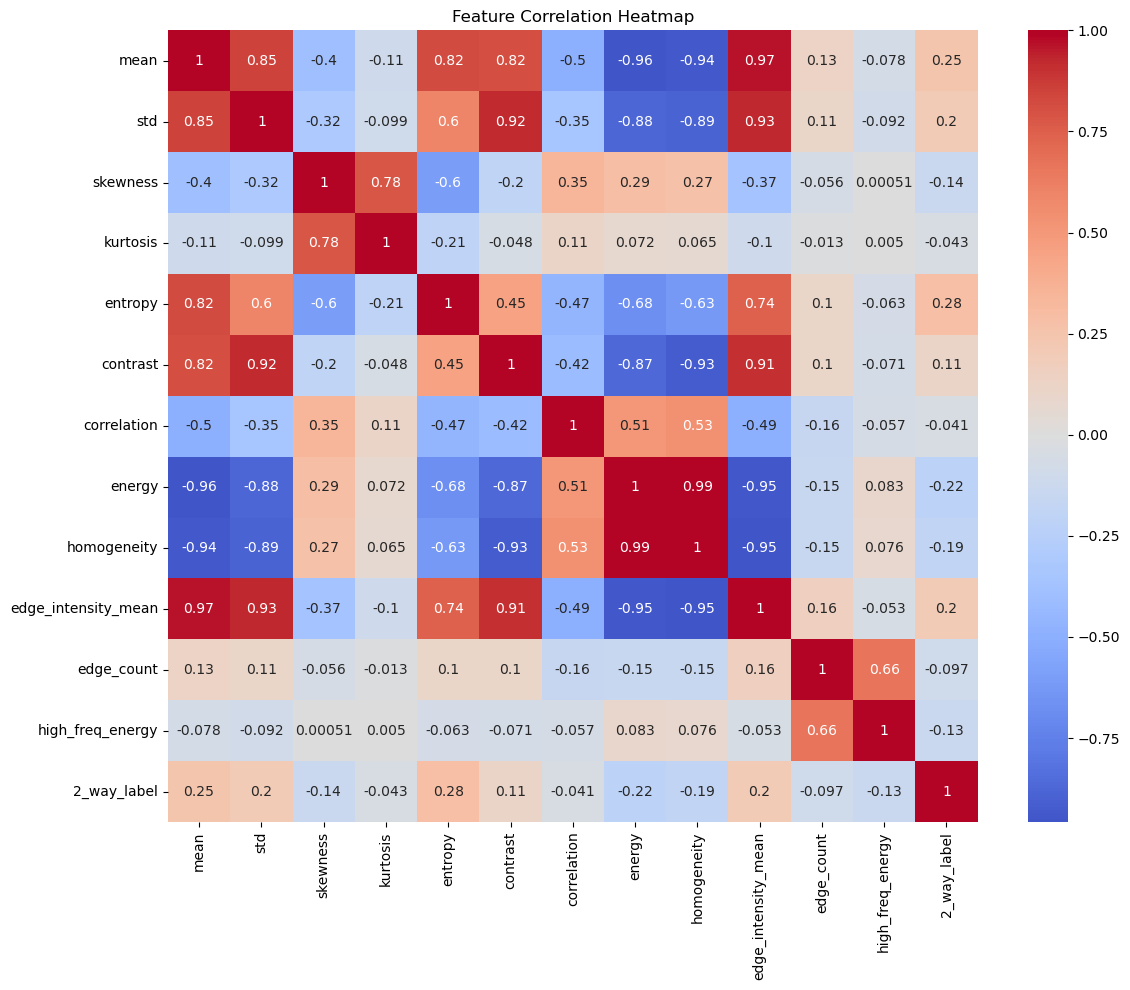

In [6]:
# Set up plotting style
sns.set_palette("husl")

# Filter numerical features
numerical_features = full_df.select_dtypes(include=[np.number])

# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

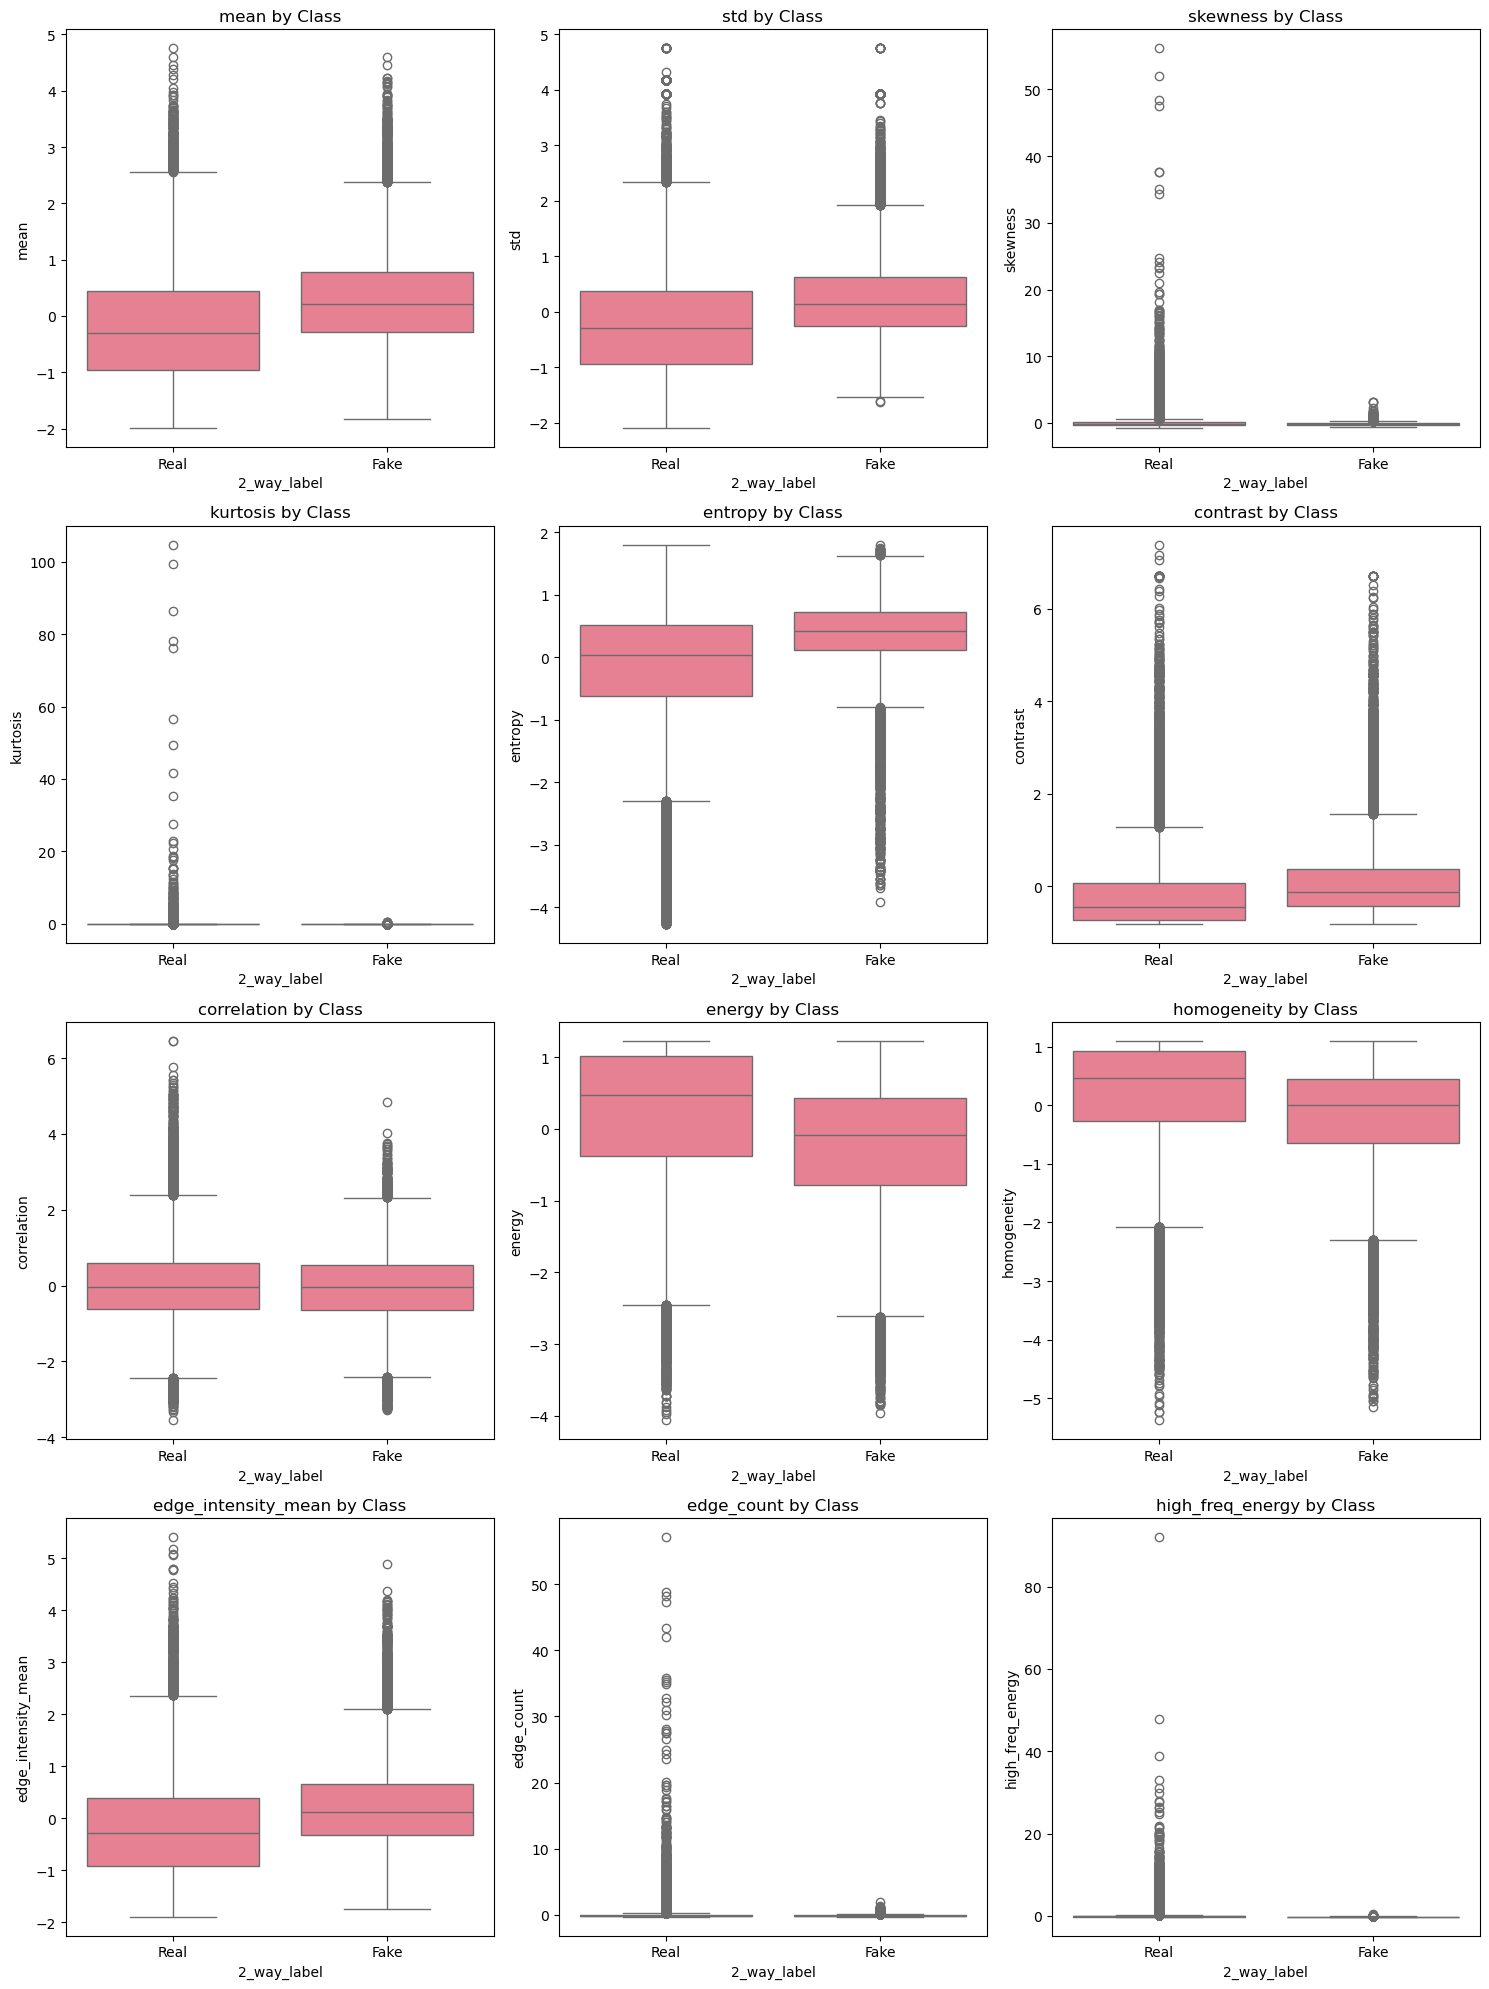

In [7]:
# 2. Box Plots for each numerical feature
numerical_features = features_df.select_dtypes(include=[np.number])
n_features = len(numerical_features.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='2_way_label', y=feature, data=full_df)
    plt.title(f'{feature} by Class')
    plt.xticks([0, 1], ['Real', 'Fake'])
plt.tight_layout()
plt.show()

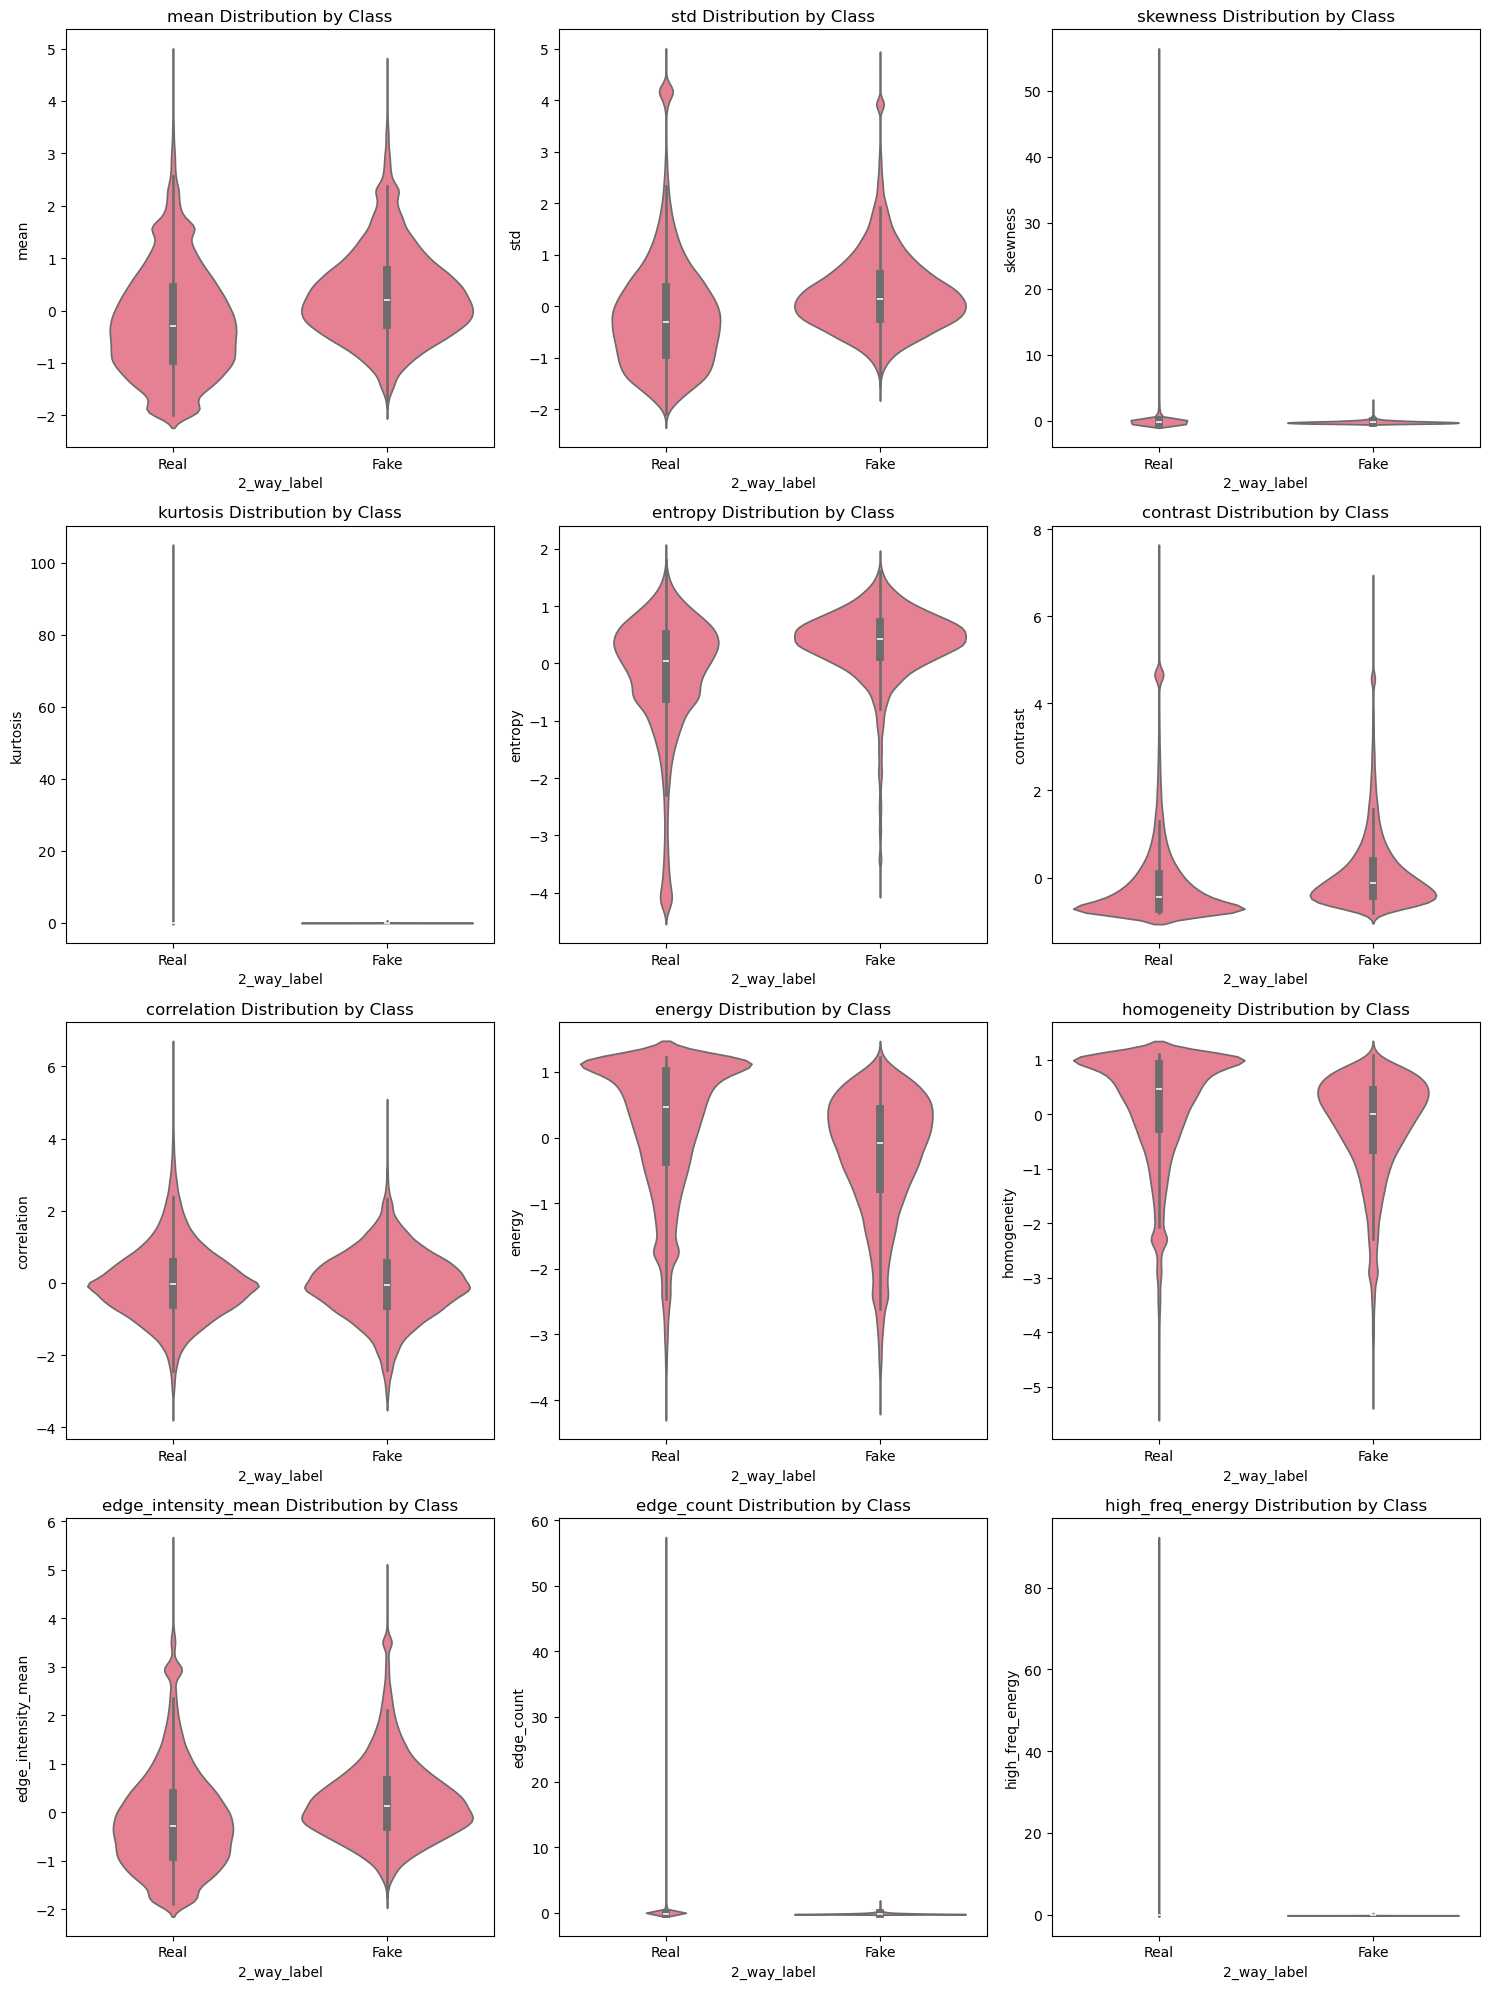

In [8]:
# 3. Violin Plots for Distribution
numerical_features = features_df.select_dtypes(include=[np.number])
n_features = len(numerical_features.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x='2_way_label', y=feature, data=full_df)
    plt.title(f'{feature} Distribution by Class')
    plt.xticks([0, 1], ['Real', 'Fake'])
plt.tight_layout()
plt.show()

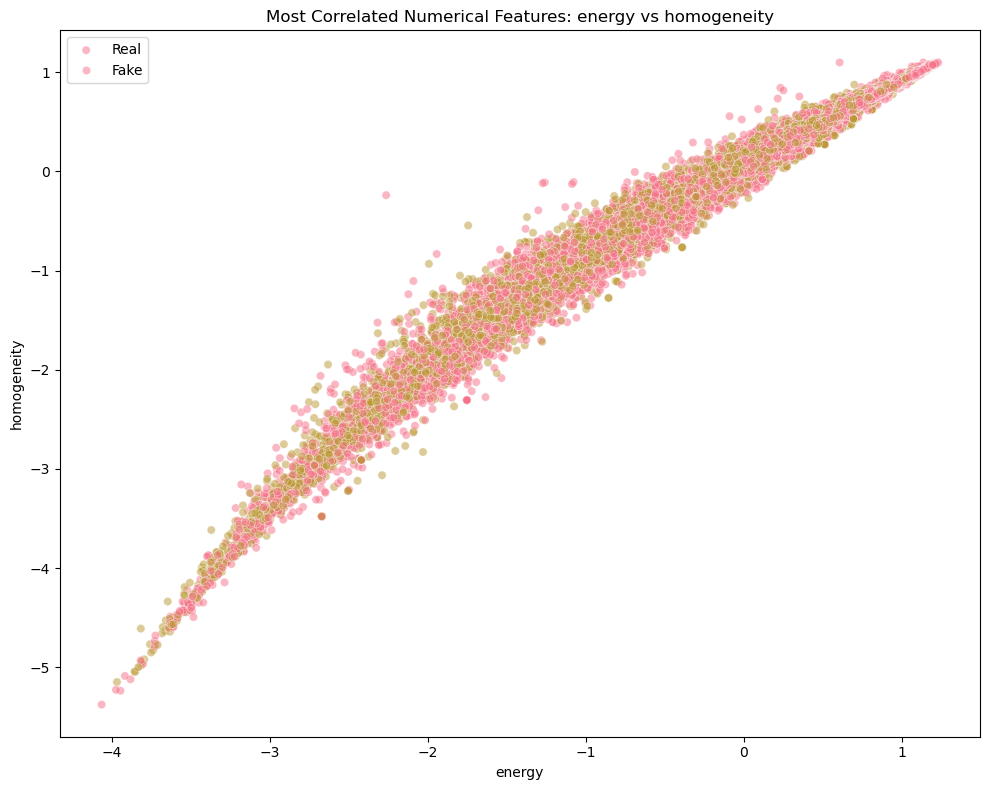

In [9]:
# 4. Find and plot most correlated numerical features
numerical_features = features_df.select_dtypes(include=[np.number])
corr_matrix = numerical_features.corr().abs()
np.fill_diagonal(corr_matrix.values, 0)
most_correlated = np.unravel_index(corr_matrix.values.argmax(), corr_matrix.shape)
feat1, feat2 = corr_matrix.index[most_correlated[0]], corr_matrix.columns[most_correlated[1]]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=full_df, x=feat1, y=feat2, hue='2_way_label', alpha=0.5)
plt.title(f'Most Correlated Numerical Features: {feat1} vs {feat2}')
plt.legend(labels=['Real', 'Fake'])
plt.tight_layout()
plt.show()


Feature Importance (based on t-statistic):
                     importance
entropy               72.276587
mean                  62.499944
energy                56.034456
std                   51.090970
edge_intensity_mean   49.944117
homogeneity           47.242263
skewness              34.025658
high_freq_energy      33.337073
contrast              27.159743
edge_count            23.877392
kurtosis              10.609282
correlation           10.082443


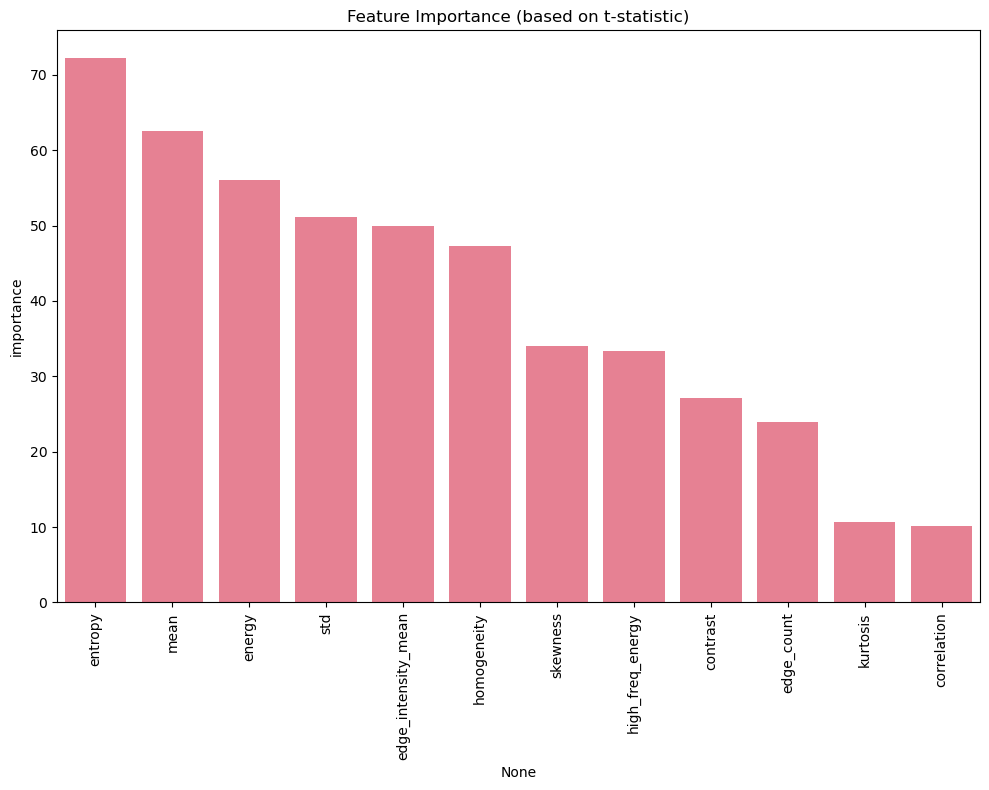

In [10]:
# Print feature importance based on separation for numerical features
from scipy import stats

numerical_features = features_df.select_dtypes(include=[np.number])
feature_importance = {}
for feature in numerical_features.columns:
    real_vals = full_df[full_df['2_way_label'] == 0][feature]
    fake_vals = full_df[full_df['2_way_label'] == 1][feature]
    stat, pval = stats.ttest_ind(real_vals, fake_vals)
    feature_importance[feature] = abs(stat)

# Sort and print feature importance
importance_df = pd.DataFrame({'importance': feature_importance}).sort_values('importance', ascending=False)
print("\nFeature Importance (based on t-statistic):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.index, y='importance', data=importance_df)
plt.xticks(rotation=90)
plt.title('Feature Importance (based on t-statistic)')
plt.tight_layout()
plt.show()


Feature Importance Analysis:
            Feature  Mutual_Information  Correlation      P_value
   high_freq_energy            0.143875     0.383800 0.000000e+00
             energy            0.090608     0.279498 0.000000e+00
                std            0.087703     0.269905 0.000000e+00
        homogeneity            0.086399     0.271378 0.000000e+00
           contrast            0.082041     0.267022 0.000000e+00
               mean            0.075725     0.263585 0.000000e+00
            entropy            0.073780     0.296004 0.000000e+00
edge_intensity_mean            0.072407     0.241580 0.000000e+00
           kurtosis            0.054771     0.216034 0.000000e+00
           skewness            0.047678     0.178856 0.000000e+00
         edge_count            0.030457     0.053234 7.099939e-39
        correlation            0.017431     0.015047 2.296776e-04


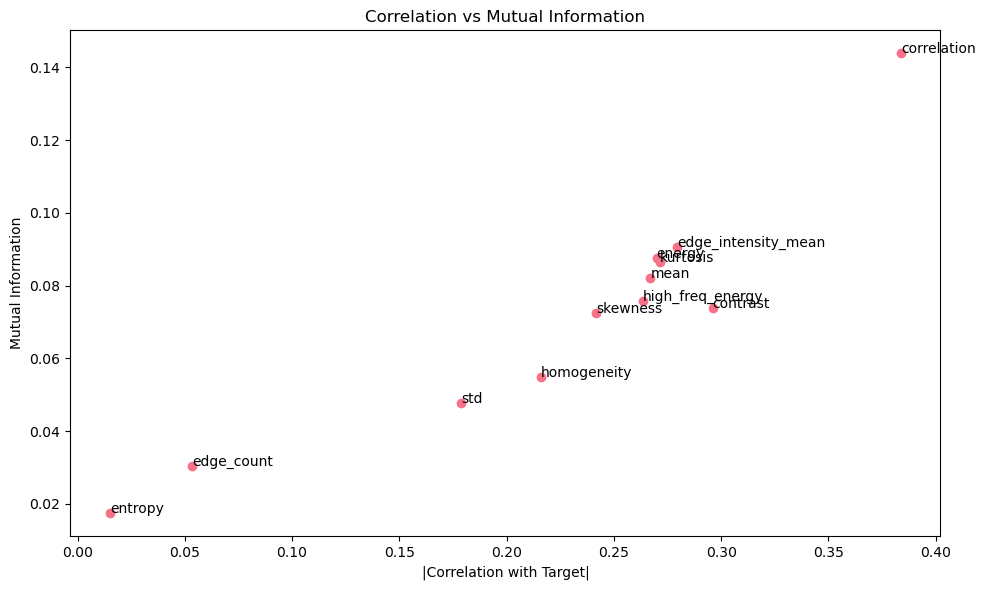

In [11]:
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import spearmanr

# Filter numerical features
numerical_features = full_df.select_dtypes(include=[np.number]).drop(columns=['2_way_label'])

# Load labels
labels = full_df['2_way_label']

# Handle missing values by filling them with the mean of the column
numerical_features = numerical_features.fillna(numerical_features.mean())

# Calculate mutual information scores
mi_scores = mutual_info_classif(numerical_features, labels)
mi_df = pd.DataFrame({'Feature': numerical_features.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Calculate Spearman correlation with target
correlations = []
p_values = []
for column in numerical_features.columns:
    correlation, p_value = spearmanr(numerical_features[column], labels)
    correlations.append(abs(correlation))
    p_values.append(p_value)

correlation_df = pd.DataFrame({
    'Feature': numerical_features.columns,
    'Correlation': correlations,
    'P-value': p_values
})
correlation_df = correlation_df.sort_values('Correlation', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=mi_df, x='Mutual Information', y='Feature')
plt.title('Feature Importance (Mutual Information with Target)')
plt.tight_layout()
plt.savefig('mutual_information_scores.png')
plt.close()

# Create combined importance DataFrame
importance_df = pd.DataFrame({
    'Feature': numerical_features.columns,
    'Mutual_Information': mi_scores,
    'Correlation': correlations,
    'P_value': p_values
})
importance_df = importance_df.sort_values('Mutual_Information', ascending=False)

print("\nFeature Importance Analysis:")
print(importance_df.to_string(index=False))

# Plot correlation vs mutual information
plt.figure(figsize=(10, 6))
plt.scatter(importance_df['Correlation'], importance_df['Mutual_Information'])
for i, feature in enumerate(importance_df['Feature']):
    plt.annotate(feature, 
                (importance_df['Correlation'][i], importance_df['Mutual_Information'][i]))
plt.xlabel('|Correlation with Target|')
plt.ylabel('Mutual Information')
plt.title('Correlation vs Mutual Information')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import pandas as pd

## Model Training Setup
Prepare data for machine learning:
1. Load and combine features with labels
2. Split into train/test sets
3. Create sample subset for initial model selection

In [4]:
# Load features and labels
file_path = 'final_multimodal_train.tsv'

# Load the data
data = pd.read_csv(file_path, sep='\t')
features_df = pd.read_csv('ela_features.csv')
labels = data.set_index('id')['2_way_label']

# Combine features and labels where features_df[id] == labels[id]
full_df = features_df.set_index('id').join(labels, on='id')
full_df.reset_index(inplace=True)

full_df = full_df.dropna()  # Remove any rows with missing values

# Split features and labels
X = full_df.drop('2_way_label', axis=1)
X.drop('id', axis=1, inplace=True)
y = full_df['2_way_label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create smaller sample for initial model selection
sample_size = 0.3
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)

## Model Selection
Define candidate models for evaluation:
- Support Vector Machine (SVM)
- Logistic Regression
- Random Forest
- Decision Tree
- XGBoost

In [3]:
# Define models to test
models = {
    'SVM': SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [4]:
# Evaluate models using cross-validation
print("Initial Model Evaluation on Sample:")
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_sample, y_sample, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name}: Mean={scores.mean():.4f} (+/- {scores.std()*2:.4f})")

# Select top performing models
top_models = dict(sorted(cv_results.items(), key=lambda x: x[1].mean(), reverse=True)[:3])
print("\nTop performing models:", list(top_models.keys()))

Initial Model Evaluation on Sample:
SVM: Mean=0.6938 (+/- 0.0172)
Logistic Regression: Mean=0.6799 (+/- 0.0132)
Random Forest: Mean=0.7244 (+/- 0.0197)
Decision Tree: Mean=0.6844 (+/- 0.0169)
XGBoost: Mean=0.7174 (+/- 0.0230)

Top performing models: ['Random Forest', 'XGBoost', 'SVM']


## Hyperparameter Configuration
Define parameter search spaces for model tuning, focusing on:
- Preventing overfitting
- Handling class imbalance
- Optimizing model complexity

In [5]:
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],                   # Regularization parameter
        'kernel': ['rbf', 'linear'],         # Kernel types
        'gamma': ['scale', 'auto', 0.1, 0.01], # Kernel coefficient
        'class_weight': ['balanced'],         # Handle class imbalance
        'probability': [True],                # Enable probability estimates
        'cache_size': [1000]                 # Faster computation
    },
    
    'Random Forest': {
        'n_estimators': [100, 200, 300],      # More trees for stability
        'max_depth': [3, 5, 7, None],         # Control tree depth to prevent overfitting
        'min_samples_split': [5, 10, 20],     # Higher values prevent too-specific splits
        'min_samples_leaf': [2, 4, 8],        # Higher values ensure leaf nodes aren't too specific
        'max_features': ['sqrt', 'log2'],     # Restrict features considered at each split
        'bootstrap': [True],                  # Enable bootstrapping
        'class_weight': ['balanced'],         # Handle class imbalance
        'max_samples': [0.7, 0.8, 0.9]       # Control sample size for each tree
    },
    
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],              # Shallow trees to prevent overfitting
        'learning_rate': [0.01, 0.05, 0.1],  # Smaller learning rates
        'subsample': [0.8, 0.9, 1.0],        # Sample ratio per tree
        'colsample_bytree': [0.8, 0.9, 1.0], # Feature ratio per tree
        'min_child_weight': [1, 3, 5],       # Control overfitting
        'gamma': [0, 0.1, 0.2],              # Minimum loss reduction
        'reg_alpha': [0, 0.1, 1.0],          # L1 regularization
        'reg_lambda': [1, 2, 5]              # L2 regularization
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

for name in top_models.keys():
    if name in param_grids:
        print(f"\nTuning {name} with RandomizedSearchCV...")
        random_search = RandomizedSearchCV(models[name], param_distributions=param_grids[name], 
                                           n_iter=50,  # Number of random samples
                                           cv=5, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        top_models[name] = random_search.best_estimator_
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best cross-validation score: {random_search.best_score_:.4f}")



Tuning Random Forest with RandomizedSearchCV...
Best parameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_samples': 0.9, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}
Best cross-validation score: 0.7389

Tuning XGBoost with RandomizedSearchCV...
Best parameters: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best cross-validation score: 0.7383

Tuning SVM with RandomizedSearchCV...


c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## Model Evaluation
Final evaluation of tuned models using:
- Accuracy metrics
- Classification reports
- Feature importance analysis

In [ ]:
# Final evaluation on test set
print("\nFinal Test Set Evaluation:")
for name, model in top_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Final Test Set Evaluation:

Random Forest:
Accuracy: 0.7309

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      7306
           1       0.63      0.76      0.69      4681

    accuracy                           0.73     11987
   macro avg       0.73      0.74      0.73     11987
weighted avg       0.75      0.73      0.73     11987


XGBoost:
Accuracy: 0.7314

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      7306
           1       0.62      0.78      0.69      4681

    accuracy                           0.73     11987
   macro avg       0.73      0.74      0.73     11987
weighted avg       0.75      0.73      0.73     11987


SVM:
Accuracy: 0.7092

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.73      7306
           1       0.59      0.83      0.69      4681


In [ ]:
# Save best model
import joblib
best_model_name = max(top_models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[0]
joblib.dump(top_models[best_model_name], 'best_model.joblib')
print(f"\nBest model ({best_model_name}) saved as 'best_model.joblib'")


Best model (XGBoost) saved as 'best_model.joblib'


## Performance Visualization
Generate visual performance metrics:
- Confusion Matrix
- ROC Curve
- Precision-Recall Curve

In [ ]:
# Feature importance for best model (if applicable)
if hasattr(top_models[best_model_name], 'feature_importances_'):
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': top_models[best_model_name].feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nFeature Importance:")
    print(importances)


Feature Importance:
                feature  importance
11     high_freq_energy    0.371492
4               entropy    0.099655
5              contrast    0.092010
1                   std    0.090552
8           homogeneity    0.075716
7                energy    0.043325
0                  mean    0.042326
9   edge_intensity_mean    0.040080
6           correlation    0.038247
10           edge_count    0.036463
3              kurtosis    0.035608
2              skewness    0.034527


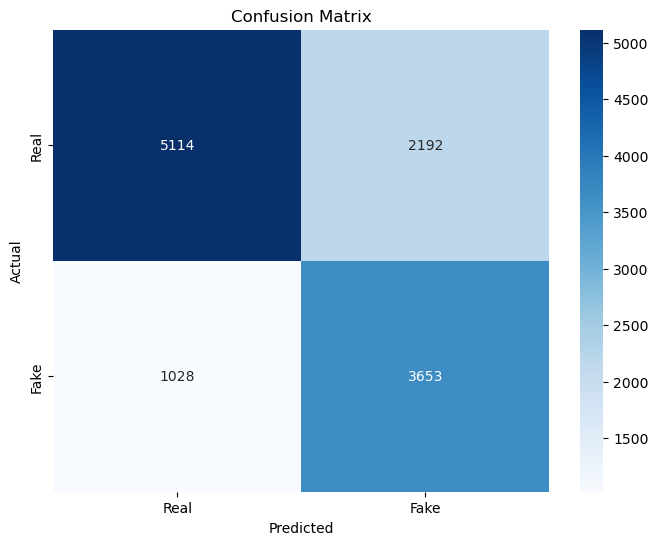

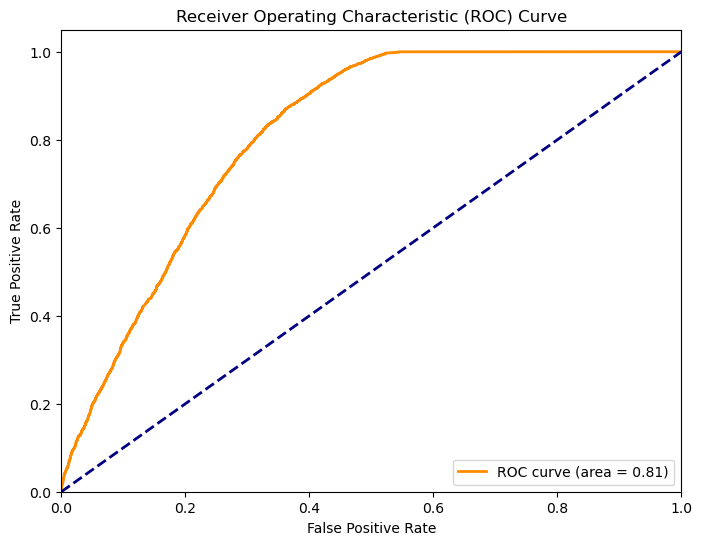

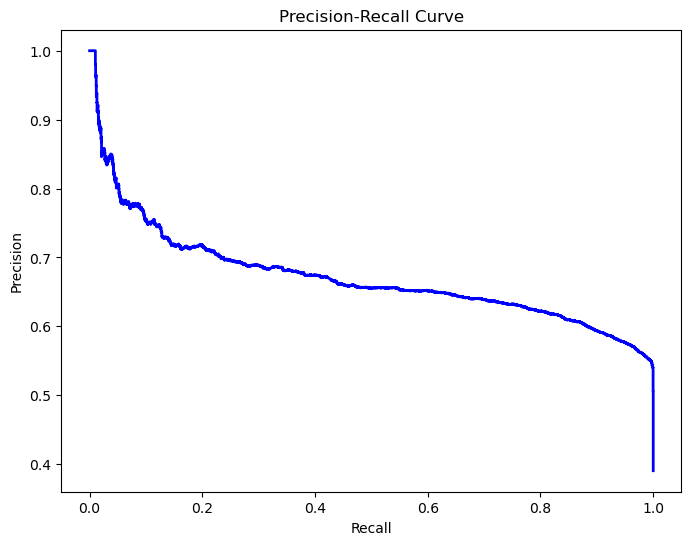

In [5]:
import joblib
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

import matplotlib.pyplot as plt

# Load the saved model
model = joblib.load('imageModel.joblib')

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()